In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [43]:
data = pd.read_csv('ted_main.csv', sep=",")

FileNotFoundError: [Errno 2] File ted_main.csv does not exist: 'ted_main.csv'

In [4]:
# Первые 5 строк датасета
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [46]:
# Размер датасета
data.shape
total_row = data.shape[0]
total_column = data.shape[1]
print('Всего строк: {}\nВсего столбцов: {}'.format(total_row, total_column))

Всего строк: 2550
Всего столбцов: 17


In [17]:
# Список колонок
columns = list(data.columns)
print(f'''Стобцы датасета: {', '.join(map(str, columns))}''')

Стобцы датасета: comments, description, duration, event, film_date, languages, main_speaker, name, num_speaker, published_date, ratings, related_talks, speaker_occupation, tags, title, url, views


In [18]:
# Список колонок с типами данных
data.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [19]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

comments - 0
description - 0
duration - 0
event - 0
film_date - 0
languages - 0
main_speaker - 0
name - 0
num_speaker - 0
published_date - 0
ratings - 0
related_talks - 0
speaker_occupation - 6
tags - 0
title - 0
url - 0
views - 0


In [20]:
# Основные статистические характеристки набора данных
data.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [21]:
# Определим уникальные значения для количества выступавших
data['num_speaker'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

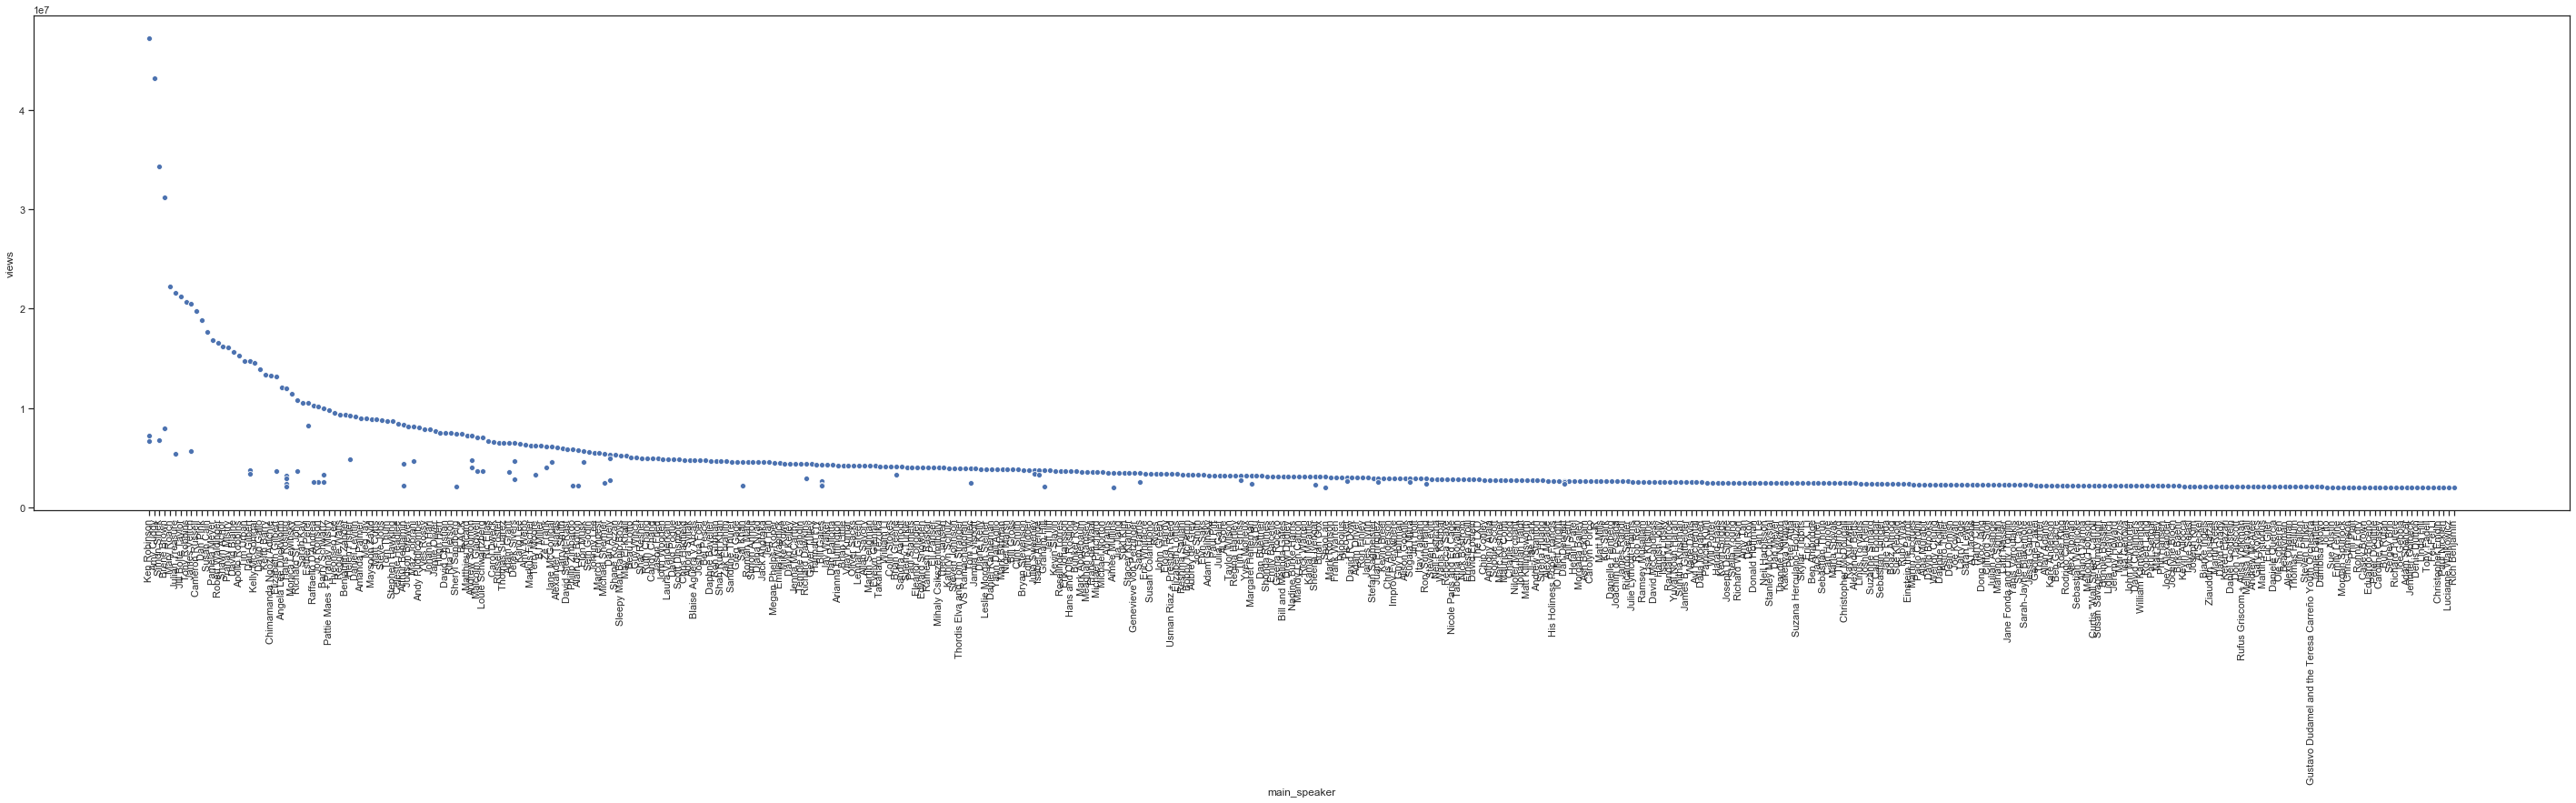

In [31]:
#Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(50,10)) 
plt.xticks(rotation=90)
sns.scatterplot(ax=ax, x='main_speaker', y='views', data=data.sort_values(by='views', ascending=False)[:500])


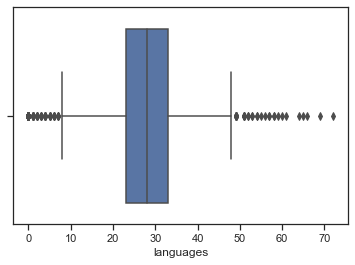

In [34]:
#Ящик с усами
sns.boxplot(x=data['languages'])

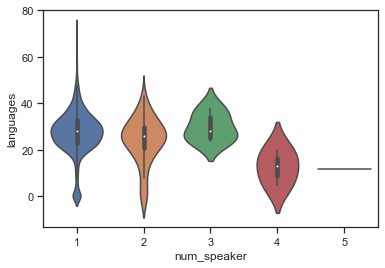

In [36]:
# Распределение параметра languages сгруппированные по num_speaker.
sns.violinplot(x='num_speaker', y='languages', data=data)

In [39]:
# Корреляционная матрица
data.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


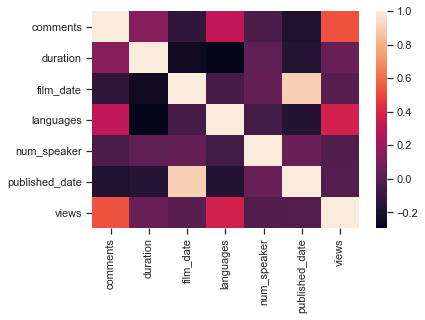

In [40]:
# визуализация корреляционной матрицы "тепловой" диаграммой
sns.heatmap(data.corr())